In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# read the training set
df = pd.read_csv('kdd_train.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [2]:
# Read the test set
df_test = pd.read_csv('kdd_test.csv')
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


# Exploratory Data Analysis

**Data Wrangling**
- Check for outliers with boxplot & histogram
- Check for duplicate records


- Apply feature scaling to the training data and test data


In [3]:
# confirm missing values in the training set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [4]:
# confirm missing values in the test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

There are no missing values in the training data and testing data. 15 variables are floats, 23 variables are integers and 4 variables are objects.

In [5]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are possible outliers in the columns:
- src_bytes
- dst_bytes
- duration
- land
- wrong_fragment	
- urgent	
- hot
- num_failed_logins
- num_compromised
- dst_host_rerror_rate	
- dst_host_srv_rerror_rate

### Check for Duplicates

In [18]:
df.duplicated().sum()

0

There are no duplicate records.

### Explore Categorical Variables

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64


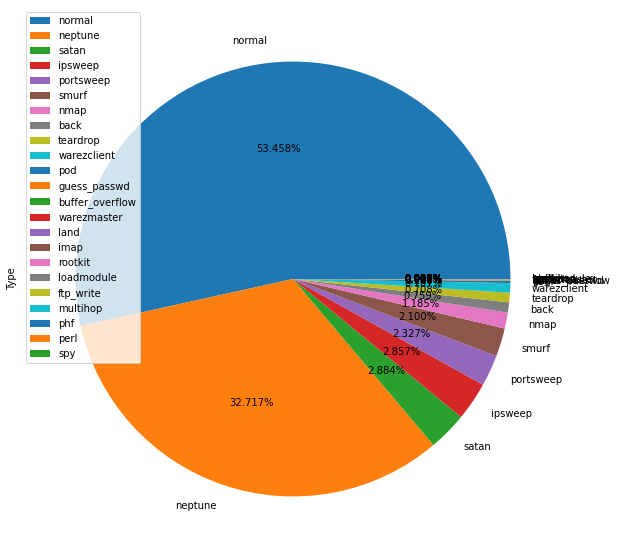

In [6]:
# check the number of unique values in the target variable

def plot_label(categorical_column):
    '''Function to plot a pie chart for categorical variables in the dataset
    
    Args
    -----
    categorical_column: str, name of categorical variable
    
    Returns
    -------
    It return a pie chart
    '''
    print(df[categorical_column].value_counts())
    df[categorical_column].value_counts().plot(kind = 'pie',
                                 figsize = (10, 10),
                                 autopct = '%1.3f%%',
                                 shadow = False)
    plt.ylabel("Type")
    plt.legend()
    plt.show()

# invoke function and plot pie chart of the labels variable
plot_label('labels')

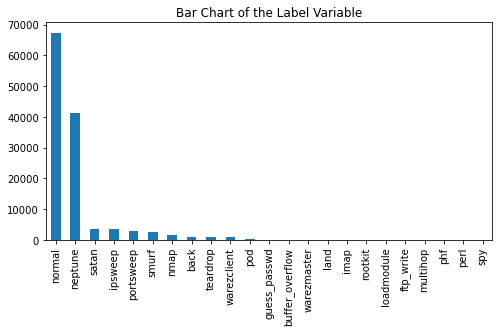

In [7]:
plt.figure(figsize=(8,4))
df['labels'].value_counts().plot(kind='bar',
                               title='Bar Chart of the Label Variable');

Feature engineer a new variable `new_label`. 
There will be five categories classes (Normal, Dos, Probe, U2R, R2L). The attack grouping is shown below.

**- Denial of Service attacks:**
* apache2
* back
* land
* neptune
* mailbomb
* pod
* processtable
* smurf
* teardrop
* udpstorm
* worm


**- Probe attacks:**
* ipsweep
* mscan
* nmap
* portsweep
* saint
* satan


**- Privilege escalation attacks:**
* buffer_overflow
* loadmdoule
* perl
* ps
* rootkit
* sqlattack
* xterm


**- Remote access attacks:**
* ftp_write
* guess_passwd
* http_tunnel
* imap
* multihop
* named
* phf
* sendmail
* snmpgetattack
* snmpguess
* spy
* warezclient
* warezmaster
* xclock
* xsnoop

The following values (neptune, satan, ipsweep, portsweep,  smurf,  nmapback, teardrop, warezclient, pod, 
guess_passwd, buffer_overflow, warezmaster, land, imap, rootkit, loadmodule, ftp_write, multihop, phf, perl, spy) will be encoded in the categories above.


In [8]:
# create categories
dos = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 
   
       'pod', 'processtable','smurf','teardrop','udpstorm','worm']

probe = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']

u2r = ['buffer_overflow', 'loadmdoule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm']

r2l = ['ftp_write', 'guess_passwd', 'http_tunnel', 'imap', 'multihop', 'named', 'phf',
       'sendmail', 'snmpgetattack', 'snmpguess', 'spy', 'warezclient', 'warezmaster',
       'xclock','xsnoop']


# df['new_label'] = df.labels != 'normal'
def map_attack(attack):
    '''Function to map attack type to the four categories listed above'''
    if attack in dos:
        value = 'DoS'
    elif attack in probe:
        value = 'Probe'
    elif attack in u2r:
        value = 'U2R'
    elif attack in r2l:
        value = 'R2L'
    else:
        value = 'Normal'
    return value

# Feature engineer a new column based on the map_attack() function
# for the training set and the test set
df['new_label'] = df.labels.map(map_attack)
df_test['new_label'] = df_test.labels.map(map_attack)

In [9]:
# check
display(df.head())
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,new_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Normal


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,new_label
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal,Normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal,Normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal,Normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal,Normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep,Probe


Normal    67352
DoS       45927
Probe     11656
R2L         995
U2R          43
Name: new_label, dtype: int64


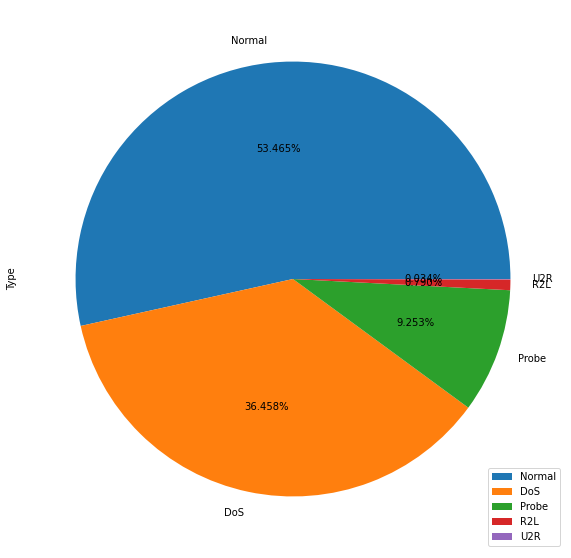

In [10]:
# plot pie chart of the new_label variable
plot_label('new_label')

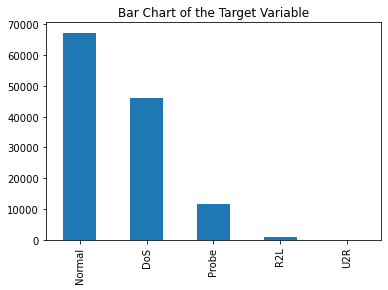

In [11]:
df['new_label'].value_counts().plot(kind='bar',
                               title='Bar Chart of the Target Variable');

53.458% of the records in the dataset are of normal traffic, 36.458% are DoS, 9.25% are Probe.

The other categorical variables in the dataset include;
- service,
- flag,
- protocol_type

Let's explore them.


There are 70 variable in the Service variable


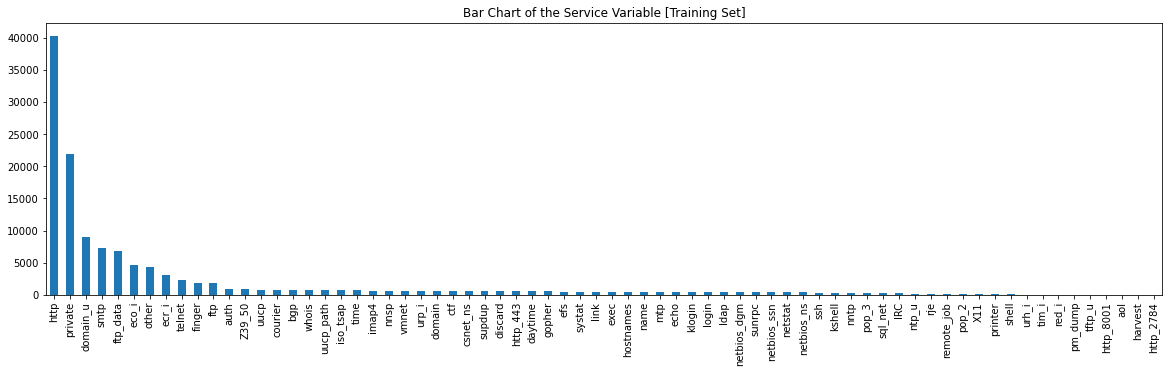

In [12]:
print("There are {} variable in the Service variable".format(
                                            len(df.service.unique())))
# set figure size
plt.figure(figsize=(20,5))
# plot bar graph
df['service'].value_counts().plot(kind='bar',
                                  title='Bar Chart of the Service Variable [Training Set]');

There are 66 variable in the Service variable in the test set


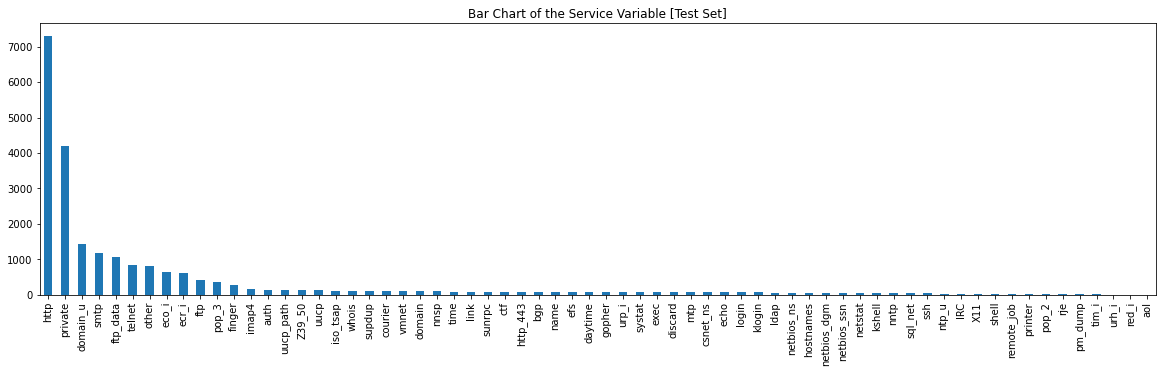

In [13]:
print("There are {} variable in the Service variable in the test set".format(
                                            len(df_test.service.unique())))

# set figure size
plt.figure(figsize=(20,5))
# plot bar graph
df_test['service'].value_counts().plot(kind='bar',
                                  title='Bar Chart of the Service Variable [Test Set]');

There are 70 unique services in the `service` variable of the dataset. 
But in the test set there are only 66 unique variables.

**Possible Options**
1. Use the top 5 most common service and encode the rest as `Others`.
2. Remove the `service` variable.

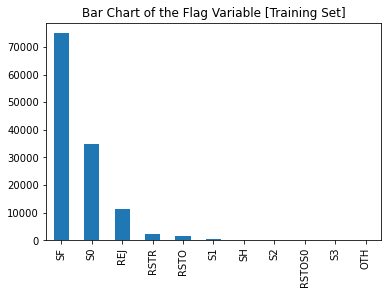

In [14]:
df['flag'].value_counts().plot(kind='bar',
                               title='Bar Chart of the Flag Variable [Training Set]');

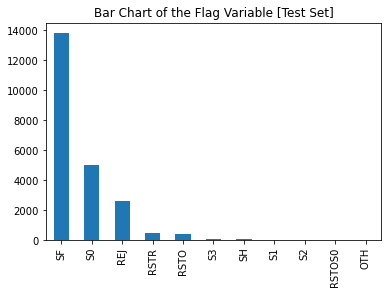

In [15]:
df_test['flag'].value_counts().plot(kind='bar',
                               title='Bar Chart of the Flag Variable [Test Set]');

There are 11 unique flags in the `flag` variable. Most of the flags are SF and S0.

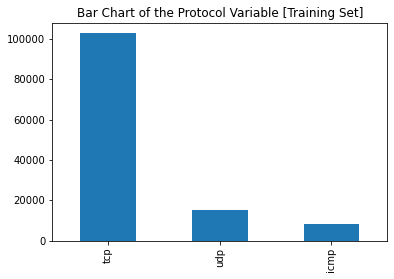

In [16]:
df['protocol_type'].value_counts().plot(kind='bar',
                               title='Bar Chart of the Protocol Variable [Training Set]');

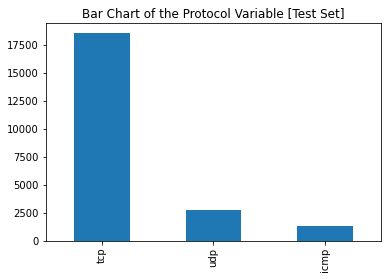

In [17]:
df_test['protocol_type'].value_counts().plot(kind='bar',
                               title='Bar Chart of the Protocol Variable [Test Set]');

There are three unique values in the `protocol_type` variable. Most of the protocol types are TCP.

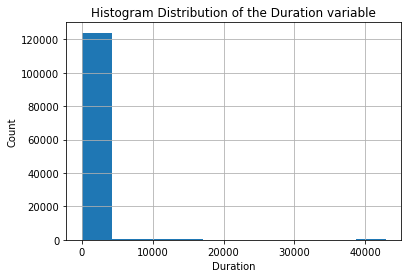

In [55]:
# Histogram distribution of the duration column
df.duration.hist()
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Histogram Distribution of the Duration variable');

### Bivariate Analysis

In [57]:
def viobox(df, x, y, suptitle):
    '''
    Function to compare the classes of a categorical variable with a numerical variable
    using a facetted boxplot and violin plot.
    
    df: DataFrame, Dataset
    x: str, categorical variable on the x-axis
    y: str, numeric variable on the y-axis
    suptitle: str, title of the plot
    color: str, color of the plot [default is base_color]
    '''
    base_color = sns.color_palette()[0]
    plt.figure(figsize=[20,5])
    plt.suptitle(suptitle, fontsize=15)
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=x, y=y, color=base_color);
    plt.subplot(1,2,2)
    sns.violinplot(data=df, x=x, y=y, color=base_color);

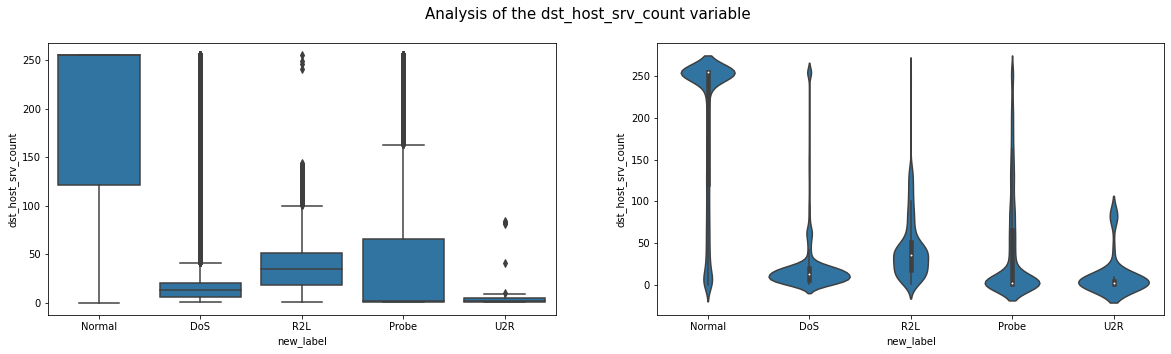

In [58]:
viobox(df=df, x='new_label', y='dst_host_srv_count',
       suptitle='Analysis of the dst_host_srv_count variable')

The violin plot on the right shows that most normal connections have a dst_host_srv_count value of above 200. If the value of the dst_host_srv_count is below 50, there is a possibility that there is an attack.

The box plot shows on the left shows that there are some outliers that range up to 250 for the Dos, R2L, Probe, and U2R attacks. The median values for these attacks is below 50.

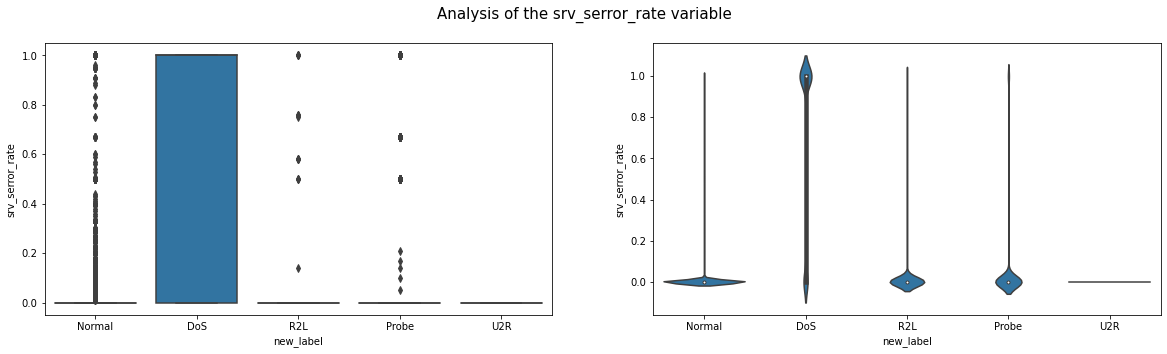

In [59]:
viobox(df=df, x='new_label', y='srv_serror_rate',
       suptitle='Analysis of the srv_serror_rate variable')

The violin plot on the right shows that the value of the srv_serror_rate for all U2R attacks does not exceed 0.2. Most normal connections, R2L and Probe attacks also fall within the range of 0 - 0.2. Most DoS attacks have srv_serror_rate of above 0.8.

If the value of srv_serror_rate is above 0.8, there's a chance it could be a DoS attack.

### Encode Categorical Features
- Apply one-hot encoding to the categorical variables in the training and test set.
- Check to make sure the encoded variable column in the training set and test set match.
- Remove one encoded variable from the original variable to avoid the dummy-variable trap.

We will remove the `Service` variable since there are 70 unique values, and not all the values are present in the test set.

In [19]:
# get the intial set of encoded features and encode them
categorical_features = ['protocol_type', 'flag']
train_encoded = pd.get_dummies(df[categorical_features])
test_encoded = pd.get_dummies(df_test[categorical_features])

In [20]:
# check
display(train_encoded)
test_encoded

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,1,0,0,0,0,0
125969,0,0,1,0,0,0,0,0,0,0,0,0,1,0
125970,0,1,0,0,0,0,0,0,0,0,0,0,1,0
125971,0,1,0,0,0,0,0,0,1,0,0,0,0,0


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,0,0,1,0,0,0,0,0,0,0,0,0
22540,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22541,0,1,0,0,0,0,0,0,1,0,0,0,0,0
22542,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
# check if the encoded columns in the test set match the encoded columns in the traininge set
train_encoded.columns == test_encoded.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [22]:
# drop the protocol_type_icmp & flag_OTH from 
# the encoded training and encoded test
col_drop = ['protocol_type_icmp', 'flag_OTH']
train_encoded.drop(col_drop, axis=1, inplace=True)
test_encoded.drop(col_drop, axis=1, inplace=True)

In [23]:
# check if they've been removed
display(train_encoded.head())
test_encoded.head()

,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0


,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0


In [24]:
# Merge encoded dataFrame with the original dataframe 
# and remove the original variables that were encoded (protocol_type & flag)

df_train = pd.concat([df, train_encoded], axis=1)
df_test = pd.concat([df_test, test_encoded], axis=1)

# check
display(df_train, df_test)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1979,udp,other,SF,145,105,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
22540,0,tcp,http,SF,254,2277,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,tcp,private,S0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22542,0,tcp,private,RSTR,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Explore the num_outbound_cmds variable

In [25]:
df_train.num_outbound_cmds.describe()

count    125973.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

The variable num_outbound_cmds has the value 0 in all the records. It won't be useful in our analysis. It will be dropped.

In [26]:
# drop some columns
columns_to_remove = ['service', 'labels', 'protocol_type',
                     'flag', 'num_outbound_cmds']

df_train.drop(columns_to_remove, inplace=True, axis=1)
df_test.drop(columns_to_remove, inplace=True, axis=1)

# check
display(df_train, df_test)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,5,2429,475,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,45,134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,45,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1979,145,105,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14462,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
22540,0,254,2277,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Correlation Analysis

There are 51 columns. This is too much. Let's perform correlation analysis to see the columns that are correlated. 
We will remove columns that have a correlation over 0.9.

In [27]:
df_train.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'new_label',
       'protocol_type_tcp', 'protocol_type_udp', 'flag_REJ', 'flag_RSTO',
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH'],
      dtype='object')

There are 50 variables. We won't be able to create a correlation pairplot for all of these variables. So we will split the variables into two subsets and plot the correlation pairplot heatmap for them.

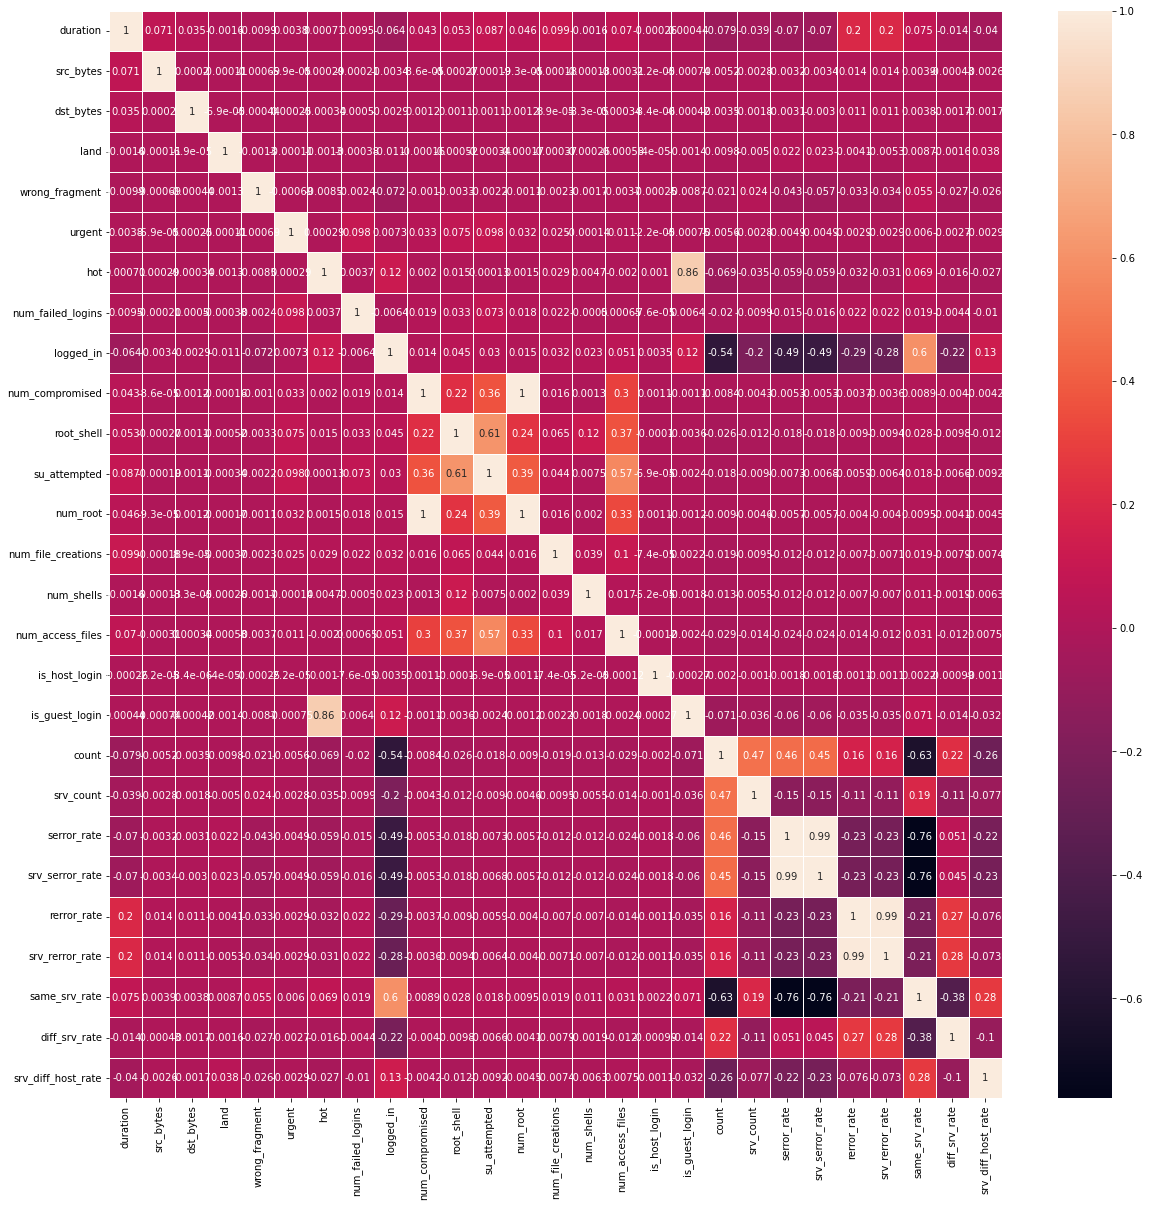

In [28]:
# Pearson's Corrrelation Plot with Seaborn
subset_1 = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate']

subset_2 = ['dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'new_label', 'protocol_type_tcp',
       'protocol_type_udp', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0',
       'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF',
       'flag_SH']



fig, ax = plt.subplots(figsize=(20,20))  # Sample figsize in inches
sns.heatmap(df_train[subset_1].corr(method='pearson'),
            annot=True, linewidths=.5, ax=ax);

- The correlation between srv_serror_rate & serror_rate is  0.99. We will remove the `srv_serror_rate` variable.
- The correlation between srv_rerror_rate & rerror_rate is  0.99. We will remove the `srv_rerror_rate` variable.
- The num_root variable has a perfect correlation of 1 with the num_compromised variable. We will remove the `num_root` variable.

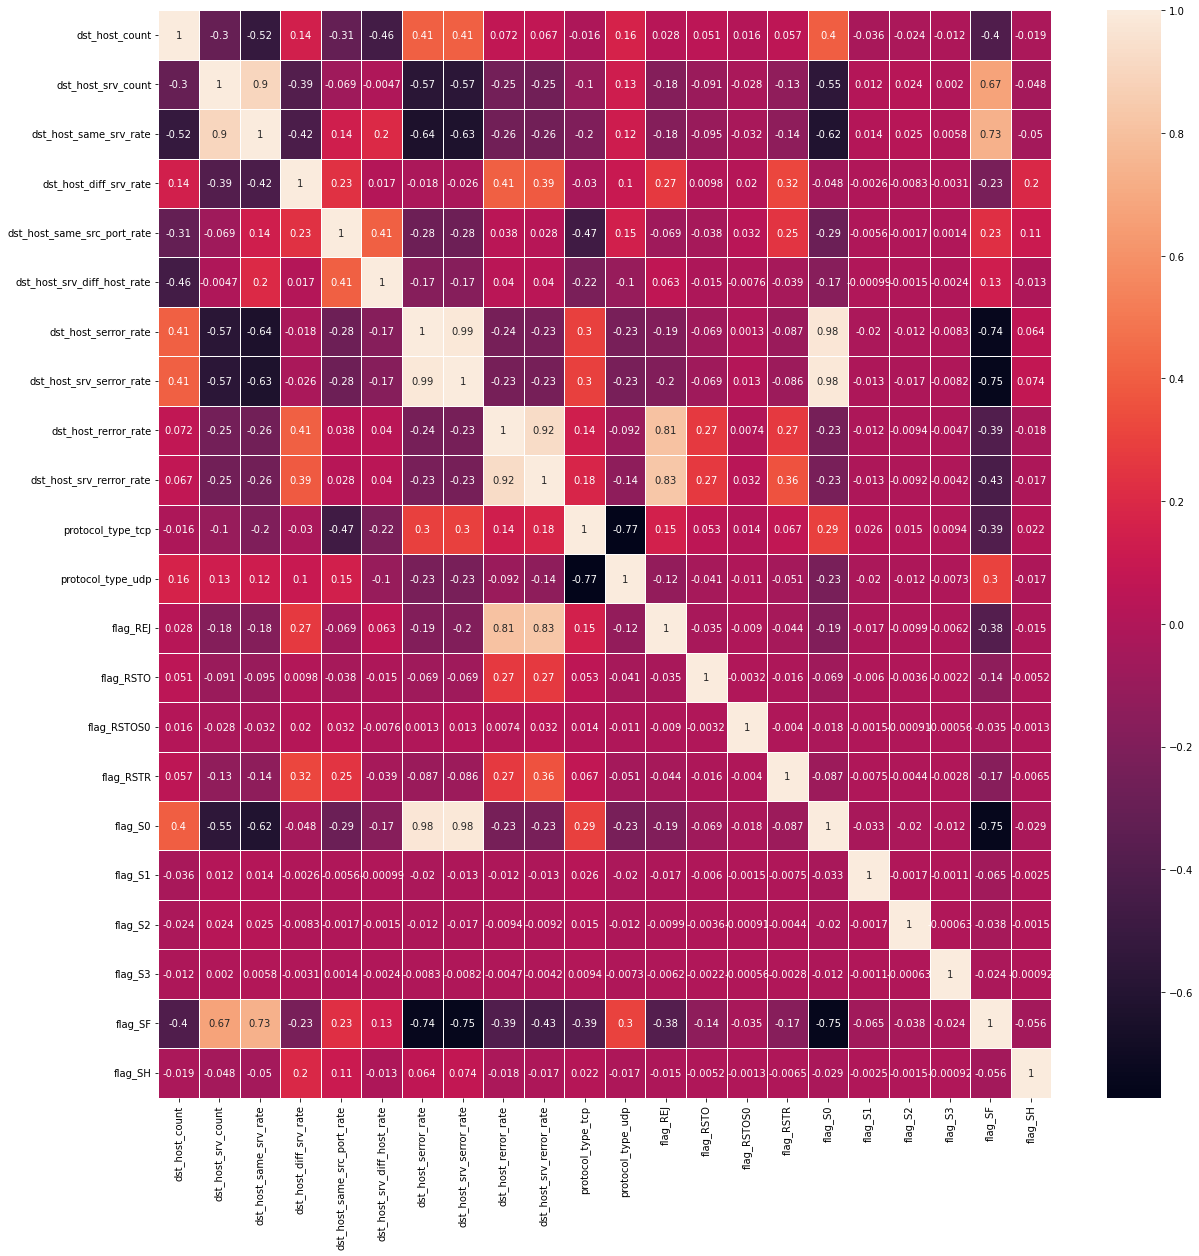

In [29]:
fig, ax = plt.subplots(figsize=(20,20))  # Sample figsize in inches
sns.heatmap(df_train[subset_2].corr(method='pearson'),
            annot=True, linewidths=.5, ax=ax);

- The correlation between dst_host_count & dst_host_srv_count is 0.9. We will remove the `dst_host_count` variable.
- The correlation between dst_host_serror_rate & dst_host_srv_serror_rate is 0.99. We will remove `dst_host_srv_serror_rate` variable.
- The correlation between dst_host_rerror_rate & dst_host_srv_rerror_rate is 0.92. We will remove the `dst_host_srv_rerror_rate` variable.
- flag_S0 has a correlation of 0.98 with dst_host_serror_rate & dst_host_srv_serror_rate. We will drop the dst_host_serror_rate variable.

In [30]:
# remove columns with high correlation

remove_columns = ['srv_serror_rate', 'srv_rerror_rate', 'num_root',
                  'dst_host_count', 'dst_host_srv_serror_rate', 
                  'dst_host_serror_rate']

df_train.drop(remove_columns, inplace=True, axis=1)
df_test.drop(remove_columns, inplace=True, axis=1)

# check
display(df_train, df_test)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,5,2429,475,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,45,134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,45,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1979,145,105,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14462,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
22540,0,254,2277,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Separate Features and Target Variable
Separate the features and target variable for the training set and test set

In [31]:
X_train = df_train[df_train.columns.difference(['new_label'])]
X_test = df_test[df_test.columns.difference(['new_label'])]

y_train = df_train.new_label.values
y_test = df_test.new_label.values

# check
display(X_train, X_test)
print("--------------------------------------------------")
print("Training target variable", y_train, sep='\n')
print("Test target variable", y_test, sep='\n')

,count,diff_srv_rate,dst_bytes,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,...,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,su_attempted,urgent,wrong_fragment
0,2,0.00,0,0.03,0.05,0.17,0.17,25,0.00,0.00,...,0.0,0,1.00,0.0,491,2,0.00,0,0,0
1,13,0.15,0,0.60,0.00,0.88,0.00,1,0.00,0.00,...,0.0,0,0.08,0.0,146,1,0.00,0,0,0
2,123,0.07,0,0.05,0.00,0.00,0.10,26,0.00,0.00,...,0.0,0,0.05,1.0,0,6,0.00,0,0,0
3,5,0.00,8153,0.00,0.00,0.03,1.00,255,0.04,0.01,...,0.0,0,1.00,0.2,232,5,0.00,0,0,0
4,30,0.00,420,0.00,0.00,0.00,1.00,255,0.00,0.00,...,0.0,0,1.00,0.0,199,32,0.09,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,184,0.06,0,0.06,0.00,0.00,0.10,25,0.00,0.00,...,0.0,0,0.14,1.0,0,25,0.00,0,0,0
125969,2,0.00,145,0.01,0.00,0.01,0.96,244,0.00,0.00,...,0.0,0,1.00,0.0,105,2,0.00,0,0,0
125970,1,0.00,384,0.06,0.01,0.00,0.12,30,0.00,0.00,...,0.0,0,1.00,0.0,2231,1,0.00,0,0,0
125971,144,0.05,0,0.05,0.00,0.00,0.03,8,0.00,0.00,...,0.0,0,0.06,1.0,0,8,0.00,0,0,0


,count,diff_srv_rate,dst_bytes,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,...,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,su_attempted,urgent,wrong_fragment
0,1,0.00,475,0.02,0.87,0.01,0.11,57,0.04,0.0,...,0.00,0,1.00,0.00,2429,1,0.00,0,0,0
1,192,0.01,134,0.02,0.00,0.01,0.80,155,0.00,0.0,...,0.00,0,0.99,0.00,45,269,0.01,0,0,0
2,121,0.00,80,0.00,0.00,0.01,1.00,255,0.00,0.0,...,0.00,0,1.00,0.00,45,121,0.00,0,0,0
3,2,0.00,105,0.84,0.00,1.00,0.01,2,0.00,0.0,...,0.00,0,1.00,0.00,145,2,0.00,0,0,0
4,2,0.00,0,0.68,1.00,1.00,0.01,2,0.00,1.0,...,1.00,0,1.00,0.00,1,2,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,395,1.00,0,1.00,0.91,0.00,0.00,1,0.00,1.0,...,0.93,0,0.00,0.06,0,1,0.00,0,0,0
22540,2,0.00,2277,0.00,0.00,0.04,1.00,255,0.04,0.0,...,0.00,0,1.00,0.00,254,2,0.00,0,0,0
22541,202,0.07,0,0.07,0.00,0.00,0.10,25,0.00,0.0,...,0.00,0,0.05,1.00,0,10,0.00,0,0,0
22542,2,1.00,0,0.58,0.58,0.57,0.00,1,0.00,1.0,...,0.50,0,0.50,0.00,0,1,0.00,0,0,0


--------------------------------------------------
Training target variable
['Normal' 'Normal' 'DoS' ... 'Normal' 'DoS' 'Normal']
Test target variable
['Normal' 'Normal' 'Normal' ... 'DoS' 'Probe' 'Normal']


### Label Encoding
Encode the target variables of the training set and the test set using the LabelEncoder class of the preprcessing module of the Scikit-Learn library.

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y_train = label_encoder.fit_transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                     label_encoder.transform(label_encoder.classes_)))

print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")

# check
display(encoded_y_train, encoded_y_test)

Mapping of Label Encoded Classes
{'DoS': 0, 'Normal': 1, 'Probe': 2, 'R2L': 3, 'U2R': 4}


array([1, 1, 0, ..., 1, 0, 1])

array([1, 1, 1, ..., 0, 2, 1])

After label encoding, 0 represents DoS class, 1 represents the Normal class, 2 represents the Probe class, 3 represents the  R2L class, and 4 represents the U2R class.

## Feature Scaling
Apply standardization to the training set and test set


In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print("Scaled Matrix of features (Training set)", scaled_X_train, sep='\n', end='\n\n')
print("Scaled Matrix of features (Testing set)", scaled_X_test, sep='\n', end='\n\n')
print("Number of records in the training set: ", len(scaled_X_train))
print("Number of records in the test set: ", len(scaled_X_test))

Scaled Matrix of features (Training set)
[[-0.71704549 -0.34968303 -0.00491864 ... -0.02443651 -0.00773599
  -0.08948642]
 [-0.62098246  0.48220055 -0.00491864 ... -0.02443651 -0.00773599
  -0.08948642]
 [ 0.33964783  0.03852931 -0.00491864 ... -0.02443651 -0.00773599
  -0.08948642]
 ...
 [-0.72577849 -0.34968303 -0.00482315 ... -0.02443651 -0.00773599
  -0.08948642]
 [ 0.52304088 -0.0723885  -0.00491864 ... -0.02443651 -0.00773599
  -0.08948642]
 [-0.72577849 -0.34968303 -0.00491864 ... -0.02443651 -0.00773599
  -0.08948642]]

Scaled Matrix of features (Testing set)
[[-7.25778495e-01 -3.49683031e-01 -4.80052200e-03 ... -2.44365073e-02
  -7.73598503e-03 -8.94864220e-02]
 [ 9.42225008e-01 -2.94224125e-01 -4.88532144e-03 ... -2.44365073e-02
  -7.73598503e-03 -8.94864220e-02]
 [ 3.22181821e-01 -3.49683031e-01 -4.89875009e-03 ... -2.44365073e-02
  -7.73598503e-03 -8.94864220e-02]
 ...
 [ 1.02955503e+00  3.85293078e-02 -4.91864438e-03 ... -2.44365073e-02
  -7.73598503e-03 -8.94864220e-02]
 

# Model Training

Define helper functions to evaluate the models and plot confusion matrix

In [34]:
# Define Evaluation Metric Functions
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


def evaluate_model(y_val, y_pred):
    """Function to evaluate model and return the metric of the model
  
    It returns a dictionary with the classification metrics.
    """
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    result = {"accuracy_score": accuracy,
              "precision_score": precision,
              "recall_score": recall,
              "f1_score": f1}
    return result


def plot_confusion_matrix(y_val, y_pred, label):
    '''function to plot confusion matrix
    
    Args
    y_val: array. The validation set of the target variable.
    y_pred: array. Model's prediction.
    label: list. A list containing all the classes in the target variable

    Returns
    It returns a plot of the confusion matrix
    '''
    cm = confusion_matrix(y_val, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='', xticks_rotation='vertical')


# class labels
label = ['DoS', 'Normal', 'Probe', 'R2L', 'U2R']

First, train the data using the AdaBoost algorithm and KNN.

### KNN

{'accuracy_score': 0.9268541518807665, 'precision_score': 0.9323402136083464, 'recall_score': 0.9268541518807665, 'f1_score': 0.9136089865749291}
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      8095
           1       0.88      0.99      0.93     11294
           2       0.96      0.88      0.92      2157
           3       0.97      0.13      0.23       964
           4       0.90      0.26      0.41        34

    accuracy                           0.93     22544
   macro avg       0.94      0.64      0.69     22544
weighted avg       0.93      0.93      0.91     22544



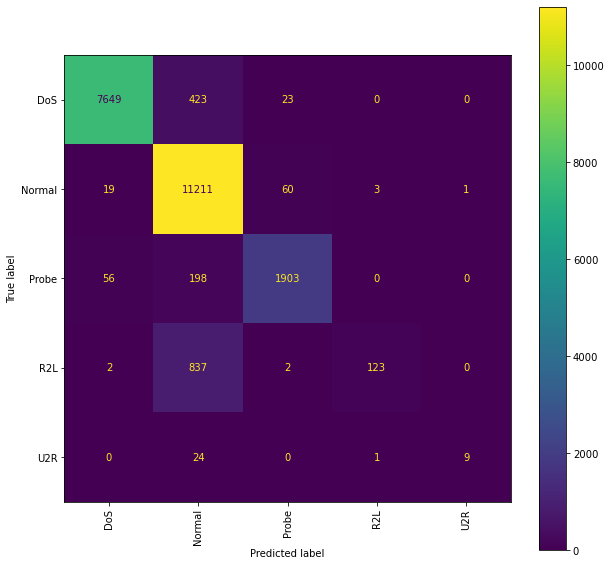

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


# Instantiate the KNN algorithm
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(scaled_X_train, encoded_y_train)

# Evaluate model on the test set
y_pred_1 = knn.predict(scaled_X_test)

print(evaluate_model(encoded_y_test, y_pred_1))
plot_confusion_matrix(encoded_y_test, y_pred_1, label)
print(classification_report(encoded_y_test, y_pred_1))

In [37]:
# Evaluate model on the training set
y_pred_train = knn.predict(scaled_X_train)
print(evaluate_model(encoded_y_train, y_pred_train))
# plot_confusion_matrix(encoded_y_train, y_pred_train, label)
# print(classification_report(encoded_y_train, y_pred_train))

{'accuracy_score': 0.9969676041691473, 'precision_score': 0.996939154890155, 'recall_score': 0.9969676041691473, 'f1_score': 0.9969383138157447}


### AdaBoost + SVM

Secondly, we train an SVM model with AdaBoost.

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy_score': 0.8514460610361959, 'precision_score': 0.8496732811080326, 'recall_score': 0.8514460610361959, 'f1_score': 0.8331025570079849}


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      0.85      0.90      8095
           1       0.80      0.96      0.87     11294
           2       0.87      0.68      0.77      2157
           3       0.63      0.02      0.04       964
           4       0.00      0.00      0.00        34

    accuracy                           0.85     22544
   macro avg       0.65      0.50      0.52     22544
weighted avg       0.85      0.85      0.83     22544



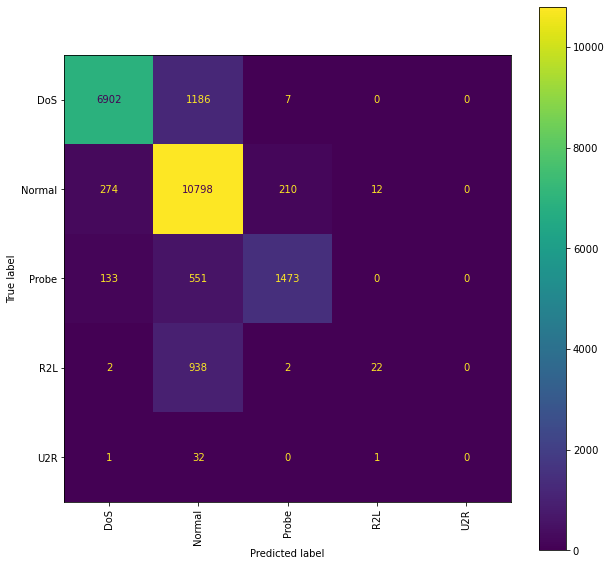

In [91]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)

# Instantiate ada
adaboost_svm = AdaBoostClassifier(base_estimator=svm, n_estimators=2, random_state=1)
adaboost_svm.fit(scaled_X_train, encoded_y_train)

# Evaluate model
y_pred_2 = adaboost_svm.predict(scaled_X_test)

print(evaluate_model(encoded_y_test, y_pred_2))
plot_confusion_matrix(encoded_y_test, y_pred_2, label)
print(classification_report(encoded_y_test, y_pred_2))

In [38]:
# # save adaboost + svm model
# pickle.dump(adaboost_svm, open('adaboost_svm.pkl', 'wb'))

# # load pickled model
adaboost_svm = pickle.load(open('adaboost_svm.pkl', 'rb'))

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy_score': 0.9117033015011153, 'precision_score': 0.9099025865392414, 'recall_score': 0.9117033015011153, 'f1_score': 0.9075216335344697}


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94     45927
           1       0.89      0.95      0.92     67352
           2       0.86      0.67      0.76     11656
           3       0.65      0.11      0.18       995
           4       0.00      0.00      0.00        43

    accuracy                           0.91    125973
   macro avg       0.67      0.53      0.56    125973
weighted avg       0.91      0.91      0.91    125973



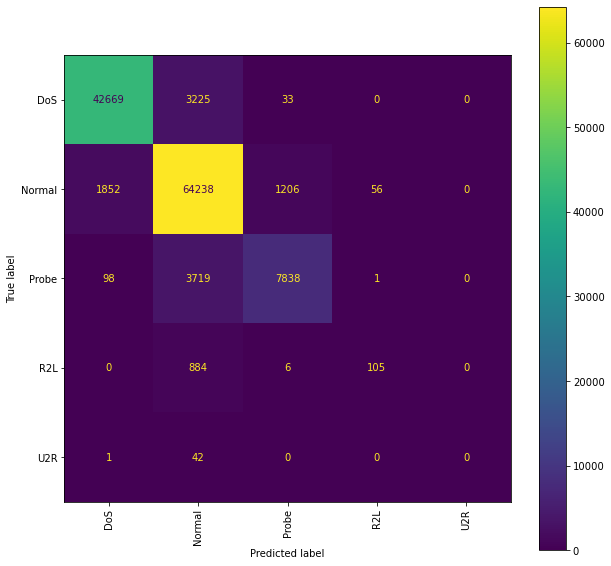

In [39]:
# Evaluate model on the training set
y_pred_train = adaboost_svm.predict(scaled_X_train)

print(evaluate_model(encoded_y_train, y_pred_train))
# plot_confusion_matrix(encoded_y_train, y_pred_train, label)
# print(classification_report(encoded_y_train, y_pred_train))

### AdaBoost + Decision Tree

{'accuracy_score': 0.8518452803406671, 'precision_score': 0.8540867514541696, 'recall_score': 0.8518452803406671, 'f1_score': 0.8421644271435391}
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8095
           1       0.82      0.95      0.88     11294
           2       0.71      0.83      0.76      2157
           3       0.46      0.10      0.16       964
           4       0.07      0.18      0.11        34

    accuracy                           0.85     22544
   macro avg       0.61      0.57      0.56     22544
weighted avg       0.85      0.85      0.84     22544



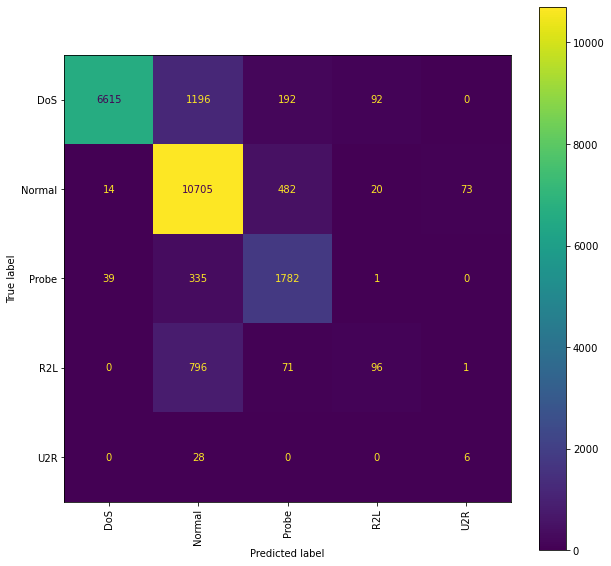

In [40]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
adaboost_dt = AdaBoostClassifier(base_estimator=dt, n_estimators=10, random_state=1)
adaboost_dt.fit(scaled_X_train, encoded_y_train)

# Evaluate model
y_pred = adaboost_dt.predict(scaled_X_test)

print(evaluate_model(encoded_y_test, y_pred))
plot_confusion_matrix(encoded_y_test, y_pred, label)
print(classification_report(encoded_y_test, y_pred))

In [41]:
# Evaluate model on the training set
y_pred_train = adaboost_dt.predict(scaled_X_train)

print(evaluate_model(encoded_y_train, y_pred_train))

{'accuracy_score': 0.9296833448437364, 'precision_score': 0.9369478077491885, 'recall_score': 0.9296833448437364, 'f1_score': 0.9315977982080175}


### AdaBoost + Logistic Regression

{'accuracy_score': 0.8773509581263307, 'precision_score': 0.8672577659203426, 'recall_score': 0.8773509581263307, 'f1_score': 0.8621723790028756}
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8095
           1       0.84      0.95      0.89     11294
           2       0.81      0.83      0.82      2157
           3       0.50      0.05      0.09       964
           4       0.50      0.21      0.29        34

    accuracy                           0.88     22544
   macro avg       0.72      0.58      0.60     22544
weighted avg       0.87      0.88      0.86     22544



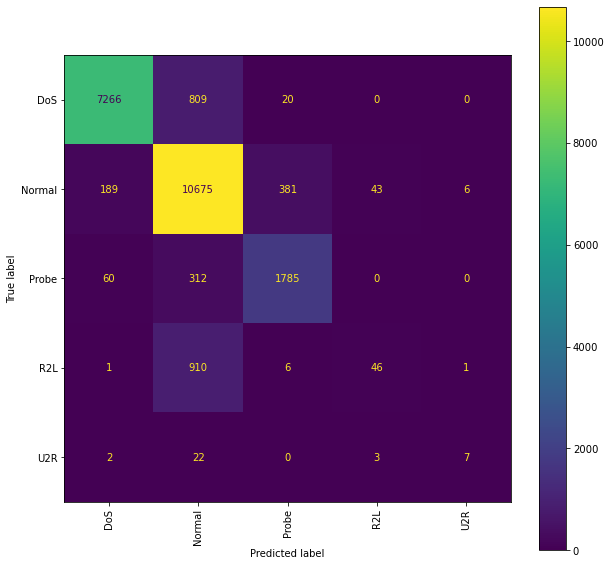

In [42]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

# Instantiate ada
adaboost_lr = AdaBoostClassifier(base_estimator=lr_model, n_estimators=15, random_state=1)
adaboost_lr.fit(scaled_X_train, encoded_y_train)

# Evaluate model
y_pred_3 = adaboost_lr.predict(scaled_X_test)

print(evaluate_model(encoded_y_test, y_pred_3))
plot_confusion_matrix(encoded_y_test, y_pred_3, label)
print(classification_report(encoded_y_test, y_pred_3))

In [43]:
# Evaluate model on the training set
y_pred_train = adaboost_lr.predict(scaled_X_train)
print(evaluate_model(encoded_y_train, y_pred_train))

{'accuracy_score': 0.9430671651861907, 'precision_score': 0.9435843434548358, 'recall_score': 0.9430671651861907, 'f1_score': 0.9428998866127832}


Finally, we train a voting classifier with adaboost_1 and adaboost_2.

In [ ]:
# Defining Hybrid Ensemble Learning Model
from sklearn.ensemble import VotingClassifier

estimators = []

# add knn model
estimators.append(('knn', knn))

# add adaboost_svm model
estimators.append(('adaboost_svm', adaboost_svm))

# Defining the ensemble model
ensemble = VotingClassifier(estimators,
                            voting='hard',
                            weights=[2, 1],
                            n_jobs=-1)

ensemble.fit(scaled_X_train, encoded_y_train)

{'accuracy_score': 0.9268097941802697, 'precision_score': 0.9322895574125767, 'recall_score': 0.9268097941802697, 'f1_score': 0.9135655475514}
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      8095
           1       0.88      0.99      0.93     11294
           2       0.96      0.88      0.92      2157
           3       0.97      0.13      0.23       964
           4       0.90      0.26      0.41        34

    accuracy                           0.93     22544
   macro avg       0.94      0.64      0.69     22544
weighted avg       0.93      0.93      0.91     22544



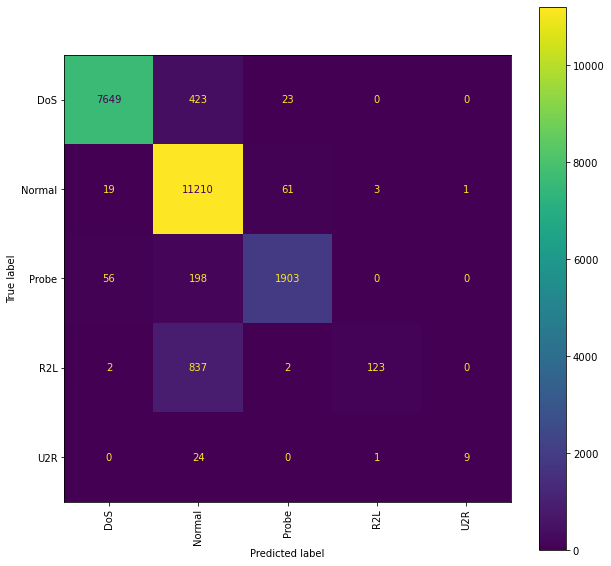

In [37]:
# Evaluate model on test set
y_pred_hybrid = ensemble.predict(scaled_X_test)

print(evaluate_model(encoded_y_test, y_pred_hybrid))
plot_confusion_matrix(encoded_y_test, y_pred_hybrid, label)
print(classification_report(encoded_y_test, y_pred_hybrid))

In [35]:
# pickle.dump(ensemble, open('ensemble_knn_adaboost.pkl', 'wb'))

# load pickled model
ensemble = pickle.load(open('ensemble_knn_adaboost.pkl', 'rb'))

In [36]:
# Evaluate model on the training set
y_pred_train = ensemble.predict(scaled_X_train)
print(evaluate_model(encoded_y_train, y_pred_train))

{'accuracy_score': 0.9969676041691473, 'precision_score': 0.9969391602506813, 'recall_score': 0.9969676041691473, 'f1_score': 0.996938323829146}


### Visualize the results
Visualize the results on the training set and test set

In [43]:
 # Create empty list for accuracy, precision, recall and f1-score of each ml algorithm
# Training result
accuracy_score_train = [99.70, 91.17, 99.70, 94.31, 92.97]
precision_score_train = [99.69, 90.99, 99.69, 94.35, 93.69]
recall_score_train = [99.70, 91.17, 99.70, 94.31, 92.97]
f1_score_train = [99.69, 90.75, 99.69, 94.29, 93.16]

# Test result
accuracy_score_test = [92.68, 85.14, 92.68, 87.74, 85.18]
precision_score_test = [93.23, 84.97, 93.23, 86.73, 85.41]
recall_score_test = [92.68, 85.14, 92.68, 87.74, 85.18]
f1_score_test = [91.36, 83.31, 91.36, 86.22, 84.22]

models = ["KNN", "AdaBoost + SVM", "Voting Classifier",
          "AdaBoost + Logistic Regression", "AdaBoost + Decision Tree"]

def visualize_result(accuracy_score, precision_score, recall_score, f1_score, models, title):
    '''Function to visualize the results
    
    Args
    -----
    accuracy_score: list, containing accuracy scores of the different models
    precision_score: list, containing precision scores of the different models
    recall_score: list, containing recall scores of the different models
    f1_score: list, containing f1 scores of the different models
    models: list, contains the diffent models
    title: str, title of the plot
    
    Note
    ------
    The length of accuracy_score, precision_score, recall_score, f1_score, models must match.
    In this instance the length is 3.
    
    Returns
    -------
    A grouped bar chart comparing the preformance of the different models
    '''
    X = np.arange(5)
    colors = ['navy', 'orange', 'green', 'darkred']
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, accuracy_score, color='navy', width=0.20)
    ax.bar(X + 0.20, precision_score, color='orange', width=0.20)
    ax.bar(X + 0.40, recall_score, color='green', width=0.20)
    ax.bar(X + 0.60, f1_score, color='darkred', width=0.20)
    plt.xticks(X + 0.30, models, rotation=30)
    plt.xlabel("ML Algorithms", fontsize=16)
    plt.ylabel("Scores", fontsize=16)
    plt.title(title, fontsize=18)
    plt.legend(["Accuracy", "Precision", "Recall", "F1"])

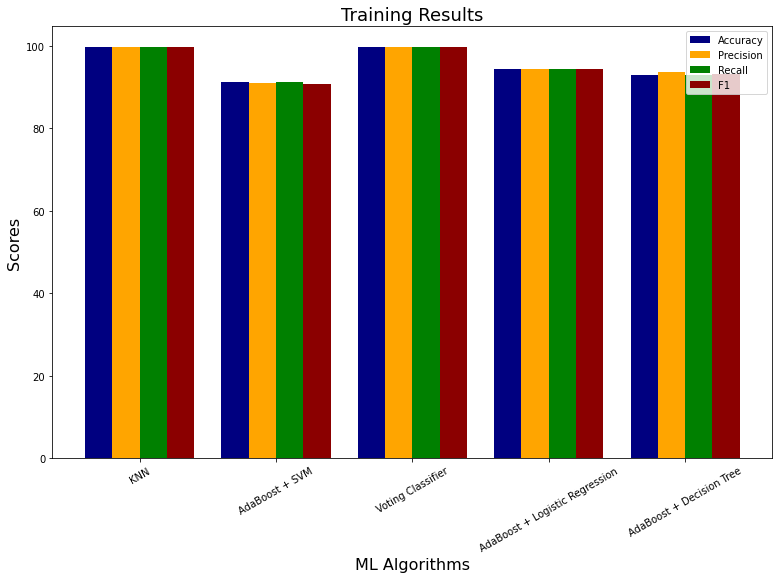

In [44]:
visualize_result(accuracy_score_train, 
                 precision_score_train,
                 recall_score_train,
                 f1_score_train, 
                 models, 
                 "Training Results")

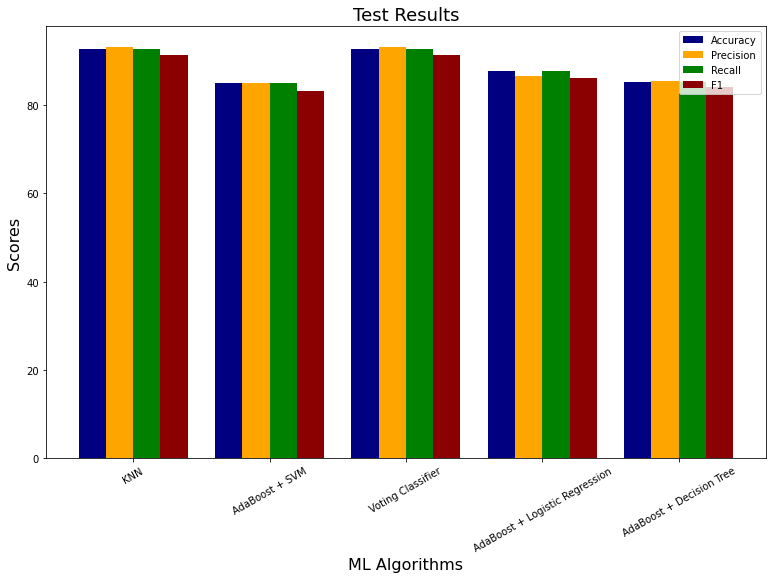

In [45]:
visualize_result(accuracy_score_test, 
                 precision_score_test,
                 recall_score_test,
                 f1_score_test, 
                 models, 
                 "Test Results")

## Export Result
Save the test result as a CSV file for further evaluation.

In [46]:
# Export model's test set prediction to a CSV file

# Merge the hybrid model prediction with the test set
df_test['model_prediction_number'] = y_pred_hybrid

mapping = {0:'DoS', 1:'Normal', 2:'Probe', 3:'R2L', 4:'U2R'}

# map the model prediction to text
df_test['model_prediction'] = df_test['model_prediction_number'].map(mapping)

# check
df_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,model_prediction_number,model_prediction
0,5,2429,475,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,Normal
1,0,45,134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Normal
2,0,45,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Normal
3,1979,145,105,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Normal
4,14462,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,Probe


In [49]:
columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
        'protocol_type_tcp', 'protocol_type_udp', 'flag_REJ', 'flag_RSTO',
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'model_prediction_number', 'actual_value', 'model_prediction']

In [52]:
# rename column
df_test.rename(columns={'new_label':'actual_value'}, inplace=True)
# rearrange the columns
df_test = df_test[columns]

In [53]:
df_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,model_prediction_number,actual_value,model_prediction
0,5,2429,475,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,Normal,Normal
1,0,45,134,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,Normal,Normal
2,0,45,80,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,Normal,Normal
3,1979,145,105,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,Normal,Normal
4,14462,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,Probe,Probe


In [54]:
# save dataframe to a CSV file
df_test.to_csv('test_set_result_for_AIRS[final].csv')